In [81]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from datetime import datetime

Описание признаков

* Id - идентификационный номер квартиры
* DistrictId - идентификационный номер района
* Rooms - количество комнат
* Square - площадь
* LifeSquare - жилая площадь
* KitchenSquare - площадь кухни
* Floor - этаж
* HouseFloor - количество этажей в доме
* HouseYear - год постройки дома
* Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности
* Social_1, Social_2, Social_3 - социальные показатели местности
* Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья
* Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров
* Price - цена квартиры

In [3]:
class DataPipeline:
    
    def __init__(self):
        self.medians = None
        self.square_quantile = None
        self.life_square_quantile = None
        self.rooms_quantile = None
        self.house_floor_quantile = None
        self.floor_quantile = None
        self.kitchen_square_quantile = None
        
    def fit(self, df):
        self.medians = df[['Healthcare_1', 'LifeSquare']].median()
        df[['Healthcare_1', 'LifeSquare']] =\
            df[['Healthcare_1', 'LifeSquare']].fillna(self.medians)
        
        # Расчет медиан
        self.square_quantile = [np.quantile(df['Square'], q=0.99), 
                                np.quantile(df['Square'], q=0.001)]
        self.life_square_quantile = [np.quantile(df['LifeSquare'], q=0.99),
                                     np.quantile(df['LifeSquare'], q=0.001)]
        self.rooms_quantile = [5, 0]
        self.house_floor_quantile = [np.quantile(df['HouseFloor'], q=0.95), 
                                     np.quantile(df['HouseFloor'], q=0.01)]
        self.floor_quantile = [np.quantile(df['Floor'], q=0.99), 
                               np.quantile(df['Floor'], q=0.001)]
        self.kitchen_square_quantile = [np.quantile(df['KitchenSquare'], q=0.99), 
                                        np.quantile(df['KitchenSquare'], q=0.001)]
        self.social_quantile = [np.quantile(df['Social_3'], q=0.95)]
        return self.square_quantile[0]
    def transform(self, df):
        

        
        
        df = df[(df['Square'] < self.square_quantile[0]) & \
                (df['Square'] > self.square_quantile[1])]
        df = df[(df['LifeSquare'] < self.life_square_quantile[0]) & \
                (df['LifeSquare'] > self.life_square_quantile[1])]
        df = df[(df['Rooms'] < self.rooms_quantile[0]) & (df['Rooms'] > \
                                                          self.rooms_quantile[1])]
#         df = df[(df['HouseFloor'] < self.house_floor_quantile[0]) & \
#                 (df['HouseFloor'] > self.house_floor_quantile[1])]
        df = df[(df['Floor'] < self.floor_quantile[0]) & \
                (df['Floor'] > self.floor_quantile[1])]
        df = df[(df['KitchenSquare'] < self.kitchen_square_quantile[0]) & \
                (df['KitchenSquare'] > self.kitchen_square_quantile[1])]
        df = df[(df['Social_3'] < self.social_quantile[0])]
        df = pd.get_dummies(df, columns=['Ecology_2','Ecology_3','Shops_2'], drop_first=True)
#         df = df.select_dtypes(include= ['int64','float64'])
        df.loc[df['HouseYear'] <= 1977,'HouseYear'] = 0
        df.loc[df['HouseYear'] > 1977,'HouseYear'] = 1
        
        return df

In [148]:
train = pd.read_csv('train.csv')
process = DataPipeline()
process.fit(train)
train = process.transform(train)

## EDA 

### Rooms

Text(0.5, 1.0, 'Rooms')

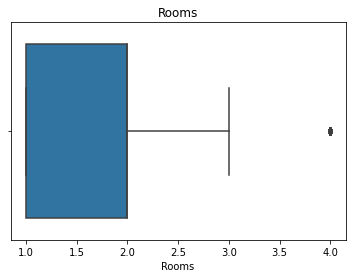

In [152]:
sns.boxplot(x = train['Rooms'])
plt.title('Rooms')

<Figure size 720x360 with 0 Axes>

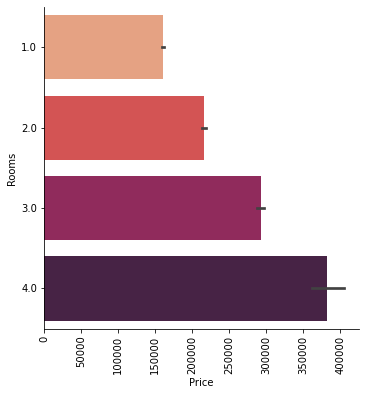

In [83]:
plt.figure(figsize = (10,5))
sns.catplot(x = 'Price', y = 'Rooms',data = train, kind = 'bar', palette = 'rocket_r', orient = 'h')
plt.xticks(rotation='vertical');

### Square

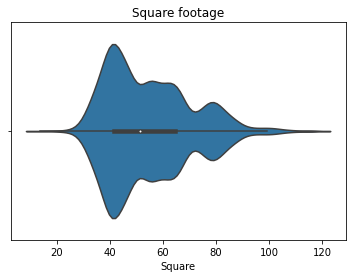

In [151]:
sns.violinplot(x = train['Square'])
plt.title('Square footage');

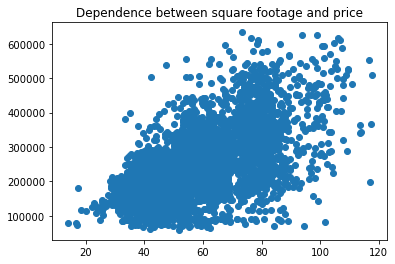

In [274]:
plt.scatter(train['Square'], train['Price'])
plt.title('Dependence between square footage and price');

### LifeSquare

In [87]:
train['LifeSquare'].isnull().value_counts()

False    8323
Name: LifeSquare, dtype: int64

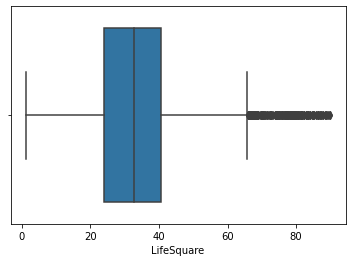

In [157]:
sns.boxplot(x = train['LifeSquare'])
axes[1].set_title('Living square footage');

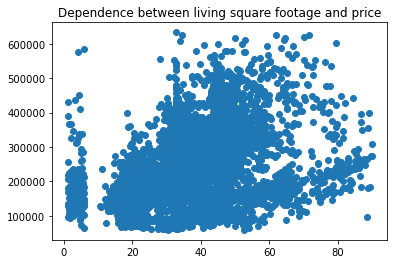

In [158]:
plt.scatter(train['LifeSquare'], train['Price'])
plt.title('Dependence between living square footage and price');

### Floor

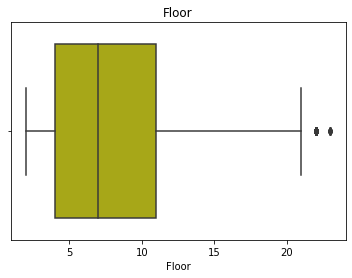

In [166]:
sns.boxplot(x = train['Floor'], color = 'y')
plt.title('Floor');

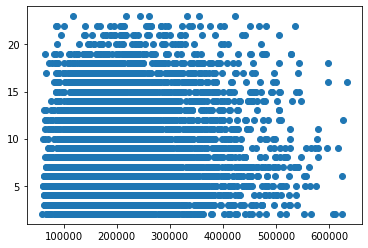

In [93]:
plt.scatter(train['Price'], train['Floor'])

### HouseFloor

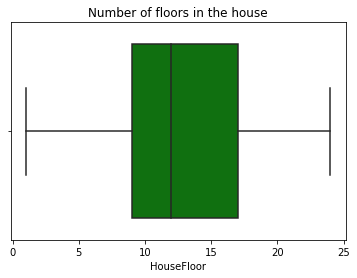

In [167]:
sns.boxplot(x = train['HouseFloor'], color = 'g')
plt.title('Number of floors in the house');

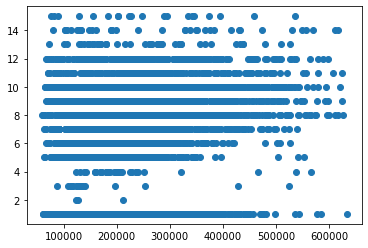

In [168]:
plt.scatter(train['Price'], train['KitchenSquare'])

## Ecology_1

Text(0.5, 1.0, 'State of the ecology in the district')

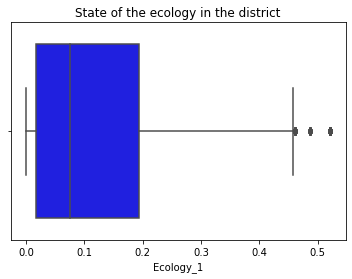

In [171]:
sns.boxplot(x = train['Ecology_1'], color = 'b')
plt.title('State of the ecology in the district')

## Social_1

Text(0.5, 1.0, 'State of the social infrastructure')

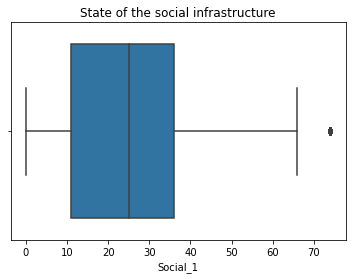

In [172]:
sns.boxplot(x = train['Social_1'])
plt.title('State of the social infrastructure')

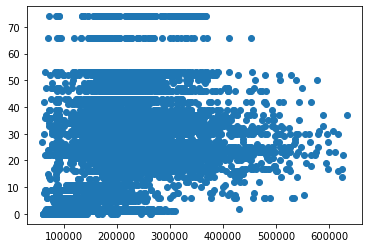

In [378]:
plt.scatter(train['Price'], train['Social_1'])

## Healthcare_1

In [404]:
median = train['Healthcare_1'].median()
train['Healthcare_1'] = train['Healthcare_1'].fillna(median)

Text(0.5, 1.0, 'State of the healthcare infrastrcture')

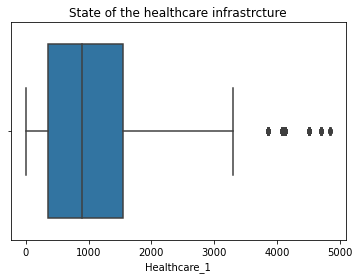

In [179]:
sns.boxplot(x = train['Healthcare_1'])
plt.title('State of the healthcare infrastrcture')

## Healthcare 2

<AxesSubplot:xlabel='Helthcare_2'>

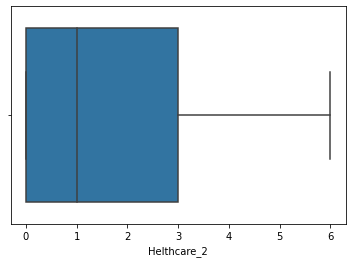

In [235]:
sns.boxplot(x = train['Helthcare_2'])

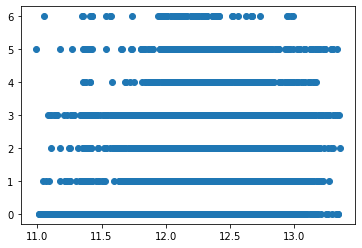

In [151]:
plt.scatter(np.log(train['Price']), train['Helthcare_2'])

## Feature engineering & selection

<AxesSubplot:>

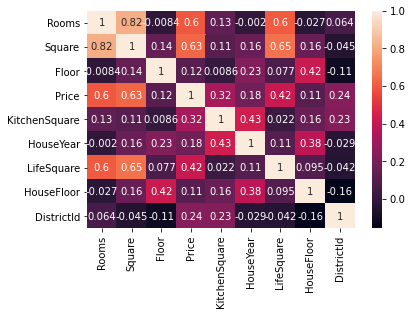

In [329]:
for_corr = train[['Rooms','Square','Floor','Price','KitchenSquare','HouseYear','LifeSquare','HouseFloor','DistrictId']]
corrmatrix = for_corr.corr()
sns.heatmap(corrmatrix, annot = True)

<AxesSubplot:>

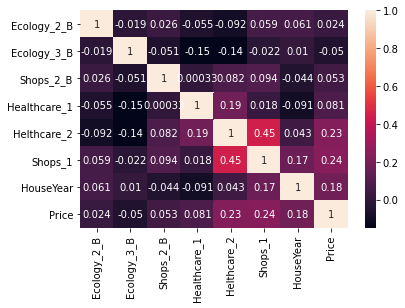

In [56]:
for_corr = train[['Ecology_2_B','Ecology_3_B','Shops_2_B','Healthcare_1','Helthcare_2','Shops_1','HouseYear','Price']]
corrmatrix = for_corr.corr()
sns.heatmap(corrmatrix, annot = True)

In [64]:
train.drop(columns = ['HouseFloor','Social_2','Rooms','Healthcare_1'], inplace = True)

Social - 1 - 2

## Models

## Gradient boosting

In [484]:
# parameters = {
#     "loss":["deviance"],
#     "learning_rate": [0.025, 0.05, 0.075],
#     "min_samples_split": [3, 4, 5, 6, 7, 10],
#     "min_samples_leaf": [3, 4, 5, 6],
#     "max_depth":[3,5,8],
#     "max_features":["log2", 'sqrt'],
#     "subsample":[0.5, 0.618, 0.8],
#     "n_estimators":np.arange(100,500,25)
#     }

# clf = GridSearchCV(GradientBoostingRegressor(), parameters,scoring= 'neg_mean_squared_error',cv=5, n_jobs=-1)

In [126]:
train = pd.read_csv('train.csv')
train = train.select_dtypes(include= ['int64','float64'])
# train.drop(columns = ['Healthcare_1','LifeSquare'], inplace = True)
med_life = train['LifeSquare'].median()
health = train['Healthcare_1'].median()
train['LifeSquare'].fillna(med_life, inplace=True)
train['Healthcare_1'].fillna(med_life, inplace=True)

In [150]:
X = train.loc[:,train.columns != 'Price']
y = train['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle = True)

In [128]:
gradient = GradientBoostingRegressor(criterion='mse', max_depth=7, min_samples_leaf= 35,random_state=42,  n_estimators=2500, max_features='sqrt', loss='huber', learning_rate=0.025)

In [129]:
gradient.fit(X_train, y_train)

GradientBoostingRegressor(criterion='mse', learning_rate=0.025, loss='huber',
                          max_depth=7, max_features='sqrt', min_samples_leaf=35,
                          n_estimators=2500, random_state=42)

In [130]:
pred = gradient.predict(X_test)

In [131]:
r2_score(y_test, pred)

0.7525261805979193

In [132]:
test = pd.read_csv('test.csv')
test = test.select_dtypes(include= ['int64','float64'])
# test.drop(columns = ['Healthcare_1','LifeSquare'], inplace = True)
# med_life = test['LifeSquare'].median()
# health = test['Healthcare_1'].median()
test['LifeSquare'].fillna(med_life, inplace=True)
# test = pd.get_dummies(test, columns=['Ecology_2','Ecology_3','Shops_2'], drop_first=True)
# test.loc[test['HouseYear'] <= 1977,'HouseYear'] = 0
# test.loc[test['HouseYear'] > 1977,'HouseYear'] = 1
test['Healthcare_1'].fillna(health, inplace=True)
prediction = gradient.predict(test)

In [133]:
prediction = pd.DataFrame(prediction,columns = ['Price'])
ids = pd.DataFrame(test,columns = ['Id'])
prediction = ids.join(prediction)
prediction.to_csv('prediction_3.csv', index_label = False, index = False)
# # final = pd.to_csv('prediction.csv', )

In [118]:
prediction

,Id,Price
0,4567,161849.763772
1,5925,123968.781725
2,960,137959.258321
3,3848,110852.632479
4,746,183825.204626
...,...,...
4995,10379,180209.189332
4996,16138,413567.587347
4997,3912,148773.430993
4998,5722,189690.624977


In [198]:
prediction.to_csv('prediction.csv', index_label = False, index = False)

In [146]:
gradient = RandomForestRegressor(criterion='mse', bootstrap = True ,max_depth=17, min_samples_leaf= 35,random_state=42,  n_estimators=700, max_features='sqrt')

In [151]:
gradient.fit(X_train, y_train)
pred = gradient.predict(X_test)
r2_score(y_test, pred)

0.675384481745819